In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math

# Многоклассовая классификация

1. загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

2. Осмотрите данные и метки.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df = pd.DataFrame(digits['data'], columns=digits['feature_names'])
df['target'] = digits['target']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
pd.DataFrame(digits['target'])

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


3. попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.

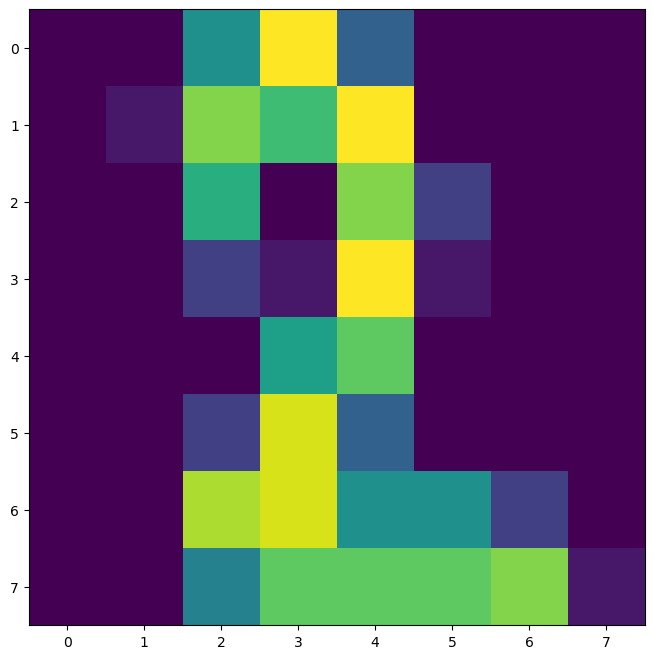

In [9]:
fig, ax = plt.subplots()
ax.imshow(digits.images[22])
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [10]:
# Похоже что изображения это цифры от 0 до 9 написанные от руки

4. Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации. 

In [11]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
X = digits.data
Y = digits.target

In [13]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [15]:
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [16]:
SGDclf.score(X,Y)

0.9699499165275459

In [17]:
pred_OvR = SGDclf.predict(X)

In [18]:
cm_OvR = confusion_matrix(Y, pred_OvR)
cm_OvR

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]], dtype=int64)

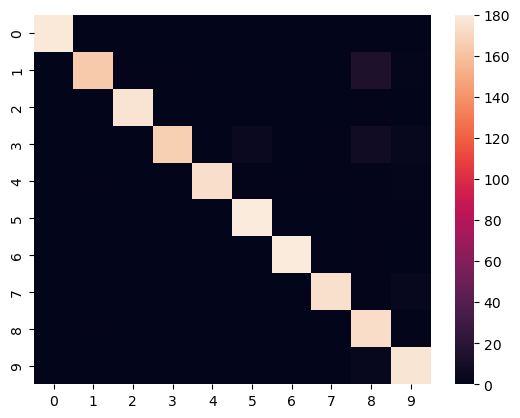

In [19]:
import numpy as np

#np.fill_diagonal(cm, 0)
sns.heatmap(cm_OvR);

5. Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.

<AxesSubplot:>

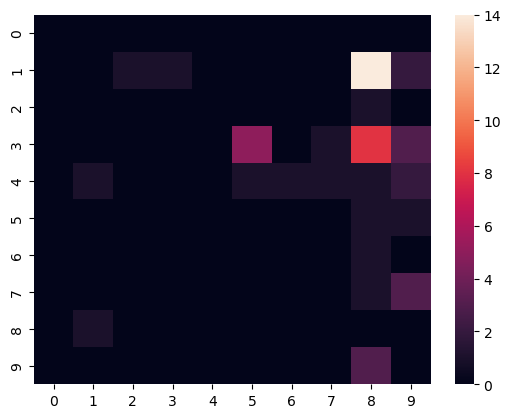

In [20]:
cm_OvR_copy = cm_OvR.copy()
np.fill_diagonal(cm_OvR_copy, 0)
sns.heatmap(cm_OvR_copy)

In [21]:
'''Вывод: Судя по матрице неточностей с обнуленной диагональю, 
многоклассовый классификатор SGDClassifier чаще всего путает цифры 1 и 8, 8 и 3, а также 3 и 5'''

'Вывод: Судя по матрице неточностей с обнуленной диагональю, \nмногоклассовый классификатор SGDClassifier чаще всего путает цифры 1 и 8, 8 и 3, а также 3 и 5'

In [22]:
# макро - считает метрики для каждой метки и берет среднее значение. 
precision_score(Y,pred_OvR, average = 'macro'), recall_score(Y,pred_OvR, average = 'macro'), f1_score(Y,pred_OvR, average = 'macro') 

(0.9720937814810465, 0.9702604940886219, 0.9701342616961084)

### OvR

In [23]:
SGDclf.decision_function([X[65]])

array([[-1487.49470607, -2587.46049624, -2980.84846946, -2545.81232129,
        -1788.15576422, -1579.82921463,  1396.42680308, -2417.5565278 ,
         -282.76523228, -2538.88922362]])

In [24]:
SGDclf.predict([X[65]])

array([6])

### OvO

In [25]:
from sklearn.multiclass import OneVsOneClassifier 

In [26]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [27]:
ovoSGD.decision_function([X[65]])

array([[5.33317651, 5.3332988 , 4.66730856, 1.6666775 , 6.33326825,
        2.66670422, 9.33332876, 0.66667661, 8.33332392, 0.66667314]])

In [28]:
ovoSGD.predict([X[65]])

array([6])

In [29]:
ovoSGD.estimators_

(SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassi

In [30]:
pred_OvO = ovoSGD.predict(X)

In [31]:
precision_score(Y,pred_OvO, average = 'macro'), recall_score(Y,pred_OvO, average = 'macro'), f1_score(Y,pred_OvO, average = 'macro') 

(1.0, 1.0, 1.0)

In [32]:
cm_OvO = confusion_matrix(Y, pred_OvO)
cm_OvO

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]], dtype=int64)

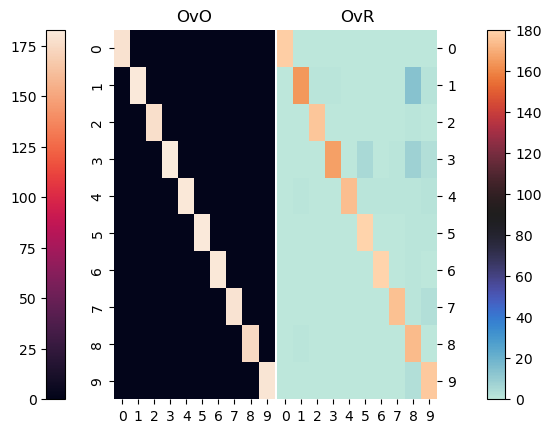

In [33]:
# Выведем матрицы неточностей двух стратегий
fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(cm_OvO, cmap="rocket", ax=ax, cbar=False)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
sns.heatmap(cm_OvR, cmap="icefire", ax=ax2, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
ax.set_title('OvO')
ax2.set_title('OvR')
plt.show()

In [34]:
'''По результатам сравнения стратегий OvO и OvR видно что стратегия OvO дала 100%-й результат, 
что выглядит хорошо, т.к. мы обучали на всем имеющемся объеме данных.
Считаю что более релевантно будет оценить качество обоих стратегий на тестовых выборках'''

'По результатам сравнения стратегий OvO и OvR видно что стратегия OvO дала 100%-й результат, \nчто выглядит хорошо, т.к. мы обучали на всем имеющемся объеме данных.\nСчитаю что более релевантно будет оценить качество обоих стратегий на тестовых выборках'

## Логистическая регрессия

1. Возьмите датасет с данными по телефонной компании с прошлых уроков.

In [85]:
train_df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [86]:
test_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


2. Подготовьте данные для обучения.

In [87]:
train_df['International plan'] = train_df['International plan'].map({'No':0, 'Yes':1})
train_df['Voice mail plan'] = train_df['Voice mail plan'].map({'No':0, 'Yes':1})
train_df = train_df.drop(['Total day minutes', 'Total eve minutes','Total night minutes', 'Total intl minutes'], axis = 1)
test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
test_df = test_df.drop(['Total day minutes', 'Total eve minutes','Total night minutes', 'Total intl minutes'], axis = 1)

In [88]:
X_train = train_df.drop(['State', 'Account length', 'Area code' , 'Churn'], axis = 1)
Y_train = train_df['Churn']
X_test = test_df.drop(['State', 'Account length', 'Area code' , 'Churn'], axis = 1)
Y_test = test_df['Churn']

In [100]:
Y_train.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int32

In [90]:
X_train.describe()

,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,0.101275,0.274944,8.021755,100.310203,30.512404,100.023631,17.033072,100.106152,9.052689,4.467367,2.764490,1.562641
std,0.301750,0.446570,13.612277,19.988162,9.215733,20.161445,4.330864,19.418459,2.285120,2.456195,0.752812,1.311236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.970000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,87.000000,24.380000,87.000000,14.050000,87.000000,7.512500,3.000000,2.300000,1.000000
50%,0.000000,0.000000,0.000000,101.000000,30.590000,100.000000,17.080000,100.000000,9.050000,4.000000,2.750000,1.000000
75%,0.000000,1.000000,19.000000,114.000000,36.700000,114.000000,19.980000,113.000000,10.640000,6.000000,3.270000,2.000000
max,1.000000,1.000000,50.000000,160.000000,59.640000,170.000000,30.910000,166.000000,17.770000,20.000000,5.400000,9.000000


In [91]:
X_test.describe()

,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.079460,0.283358,8.407796,100.937031,30.761769,100.476762,17.285262,100.113943,8.985907,4.527736,2.764948,1.563718
std,0.270659,0.450967,13.994480,20.396790,9.436463,18.948262,4.226160,20.172505,2.239429,2.482442,0.758167,1.333357
min,0.000000,0.000000,0.000000,30.000000,4.400000,37.000000,4.090000,42.000000,1.040000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,87.500000,24.860000,88.000000,14.540000,86.000000,7.560000,3.000000,2.320000,1.000000
50%,0.000000,0.000000,0.000000,101.000000,30.310000,101.000000,17.310000,100.000000,9.070000,4.000000,2.840000,1.000000
75%,0.000000,1.000000,20.000000,115.000000,37.520000,113.000000,20.095000,113.500000,10.420000,6.000000,3.255000,2.000000
max,1.000000,1.000000,51.000000,165.000000,56.830000,168.000000,30.750000,175.000000,16.550000,18.000000,4.940000,8.000000


3. Нормализуйте данные с помощью MinMaxScaler (рассматривали в конце прошлого урока)

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
mm_train = MinMaxScaler()
mm_test = MinMaxScaler()

In [94]:
mm_train.fit(X_train)
mm_test.fit(X_test)

MinMaxScaler()

In [95]:
X_train_norm = mm_train.fit_transform(X_train)
X_test_norm = mm_test.fit_transform(X_test)

4. Обучите логистическую регрессию на нормированных данных.

In [109]:
from sklearn.linear_model import LogisticRegression 
logReg = LogisticRegression()

In [110]:
logReg.fit(X_train_norm, Y_train.astype(int))

LogisticRegression()

In [111]:
logReg.predict([X_test_norm[78]])

array([0])

In [112]:
logReg.predict_proba([X_test_norm[78]])

array([[0.89751073, 0.10248927]])

In [113]:
pred = logReg.predict(X_test_norm)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
confusion_matrix(Y_test.astype(int), pred)

array([[553,  19],
       [ 80,  15]], dtype=int64)

5. Посчитайте метрики на тестовом и обучающем множествах.

In [114]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(pred, Y_test.astype(int))
rmse = math.sqrt(mse)
rmse

0.3852606742277841

In [115]:
def DummyChurn(X):
    res = np.zeros(len(X))
    return res

In [116]:
def dummyScore (X, ground):
    return 1-sum(ground-DummyChurn(X))/len(ground)

In [117]:
dummyScore(pred,Y_test.astype(int))

0.8575712143928036

In [118]:
cm = confusion_matrix(Y_test.astype(int), pred)

In [119]:
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]

In [120]:
precision = TP/(TP+FP)
precision

0.4411764705882353

In [121]:
recall = TP/(TP+FN)
recall

0.15789473684210525

In [128]:
from sklearn.ensemble import AdaBoostClassifier
Adaclf = AdaBoostClassifier()

In [129]:
Adaclf.fit(X_train_norm, Y_train.astype(int))

AdaBoostClassifier()

In [130]:
Adaclf.score(X_test_norm,Y_test.astype(int)), Adaclf.score(X_train_norm, Y_train.astype(int))

(0.8785607196401799, 0.8915978994748687)

In [131]:
from sklearn.metrics import confusion_matrix

In [133]:
pred1 = Adaclf.predict(X_test_norm)
cm = confusion_matrix (Y_test.astype(int), pred1)
cm

array([[542,  30],
       [ 51,  44]], dtype=int64)

In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [136]:
f1_score(Y_test.astype(int), pred1)

0.5207100591715976

In [137]:
Y_score = Adaclf.decision_function(X_test_norm)

In [139]:
pre, rec, tr = precision_recall_curve(Y_test.astype(int), Y_score)

In [141]:
ma = Y_score.max() 
mi = Y_score.min()

In [142]:
ma, mi

(0.7923374802975194, -0.7686057383848375)

In [144]:
predict = Y_score > -0.5

In [145]:
precision_score(Y_test.astype(int), predict), recall_score(Y_test.astype(int), predict)

(0.14442700156985872, 0.968421052631579)

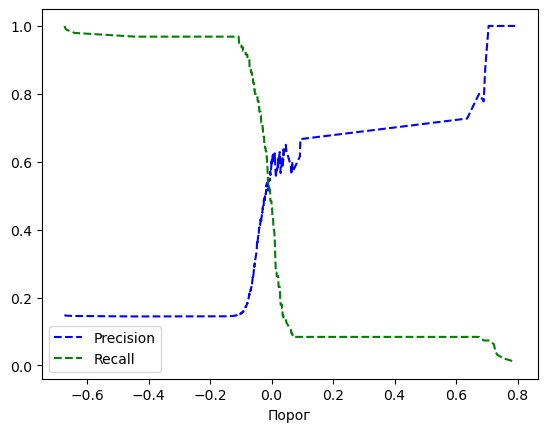

In [146]:
plt.plot(tr, pre[:-1], 'b--', label = 'Precision')
plt.plot(tr, rec[:-1], 'g--', label = 'Recall')
plt.xlabel('Порог')
plt.legend()


Text(0, 0.5, 'Точность')

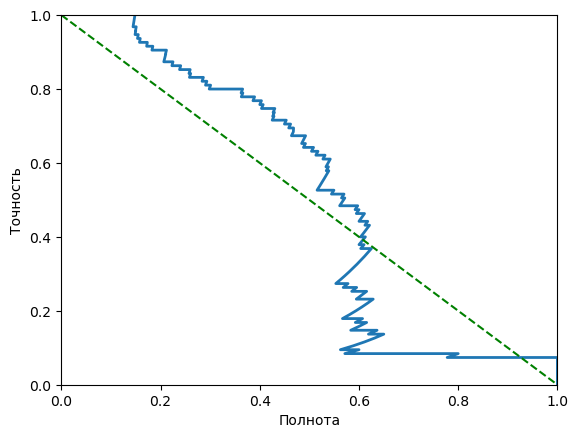

In [147]:
plt.plot(pre, rec, linewidth = 2)
plt.plot([0,1], [1,0], 'g--')
plt.axis([0,1,0,1])
plt.xlabel('Полнота')
plt.ylabel('Точность')

In [148]:
fpr, tpr, tr = roc_curve(Y_test.astype(int), Y_score)

Text(0, 0.5, 'True Positive Rate')

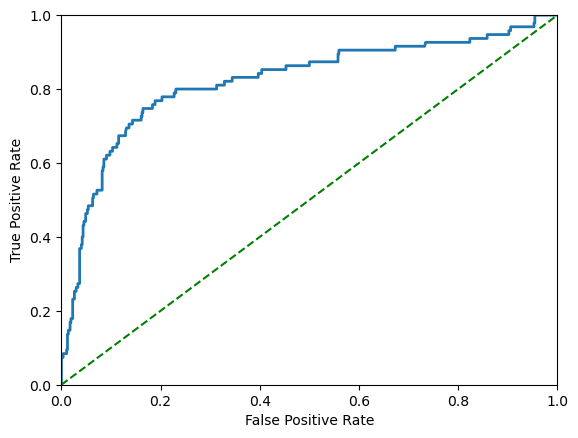

In [149]:
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'g--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [150]:
from sklearn.metrics import roc_auc_score

In [151]:
roc_auc_score (Y_test.astype(int), Y_score)

0.8211446448288555